In [1]:
import pandas as pd
import json
import ast
import re
from constants import * 

In [2]:
df = pd.read_csv('data/final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4493 entries, 0 to 4492
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ссылка на статью     4493 non-null   object 
 1   DOI                  4076 non-null   object 
 2   eLIBRARY ID          4493 non-null   int64  
 3   article_type         4493 non-null   object 
 4   year                 4493 non-null   int64  
 5   language             4493 non-null   object 
 6   title_en             4274 non-null   object 
 7   key_words_en         4232 non-null   object 
 8   abstract_en          4172 non-null   object 
 9   authors_metadata_en  4485 non-null   object 
 10  title_ru             1757 non-null   object 
 11  key_words_ru         1757 non-null   object 
 12  abstract_ru          1717 non-null   object 
 13  authors_metadata_ru  1757 non-null   object 
 14  OECD                 4493 non-null   object 
 15  Название журнала     3632 non-null   o

In [3]:
# исправляем 'русский, английский' на 'английски' и оставляем только русский и английский
df.loc[df.language == 'русский, английский', 'language'] = 'английский'
df = df[df.language.isin(['английский', 'русский'])]
df.language.value_counts()

#df.to_csv('data/final_lang_clean', index=False)

language
английский    2768
русский       1702
Name: count, dtype: int64

In [4]:
# удаляем строки title_en = None, abstract_en = None, a key_words_en = None запоняем '[]'
df = df.dropna(subset=['title_en', 'abstract_en'])
df.loc[df.key_words_en.isna(), 'key_words_en'] = '[]'
print(f'Ключевые слова отсуствуют для {df[df.key_words_en == '[]'].shape[0]} статей\n')
df.info()

df.to_csv('zeroshot/data/final_clean.csv', index=False)

Ключевые слова отсуствуют для 787 статей

<class 'pandas.core.frame.DataFrame'>
Index: 4165 entries, 0 to 4492
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ссылка на статью     4165 non-null   object 
 1   DOI                  3847 non-null   object 
 2   eLIBRARY ID          4165 non-null   int64  
 3   article_type         4165 non-null   object 
 4   year                 4165 non-null   int64  
 5   language             4165 non-null   object 
 6   title_en             4165 non-null   object 
 7   key_words_en         4165 non-null   object 
 8   abstract_en          4165 non-null   object 
 9   authors_metadata_en  4157 non-null   object 
 10  title_ru             1498 non-null   object 
 11  key_words_ru         1498 non-null   object 
 12  abstract_ru          1498 non-null   object 
 13  authors_metadata_ru  1498 non-null   object 
 14  OECD                 4165 non-null   object 
 15  Н

# Tokens

In [5]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("togethercomputer/LLaMA-2-7B-32K")

/home/galinyshka/code/new_pars/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [6]:
df['text'] = df['title_en'] + ' ' + df['abstract_en'] + ' ' + df['key_words_en']
df['num_tokens'] = df['text'].apply(lambda x: len(tokenizer(x, return_tensors=None)["input_ids"]))

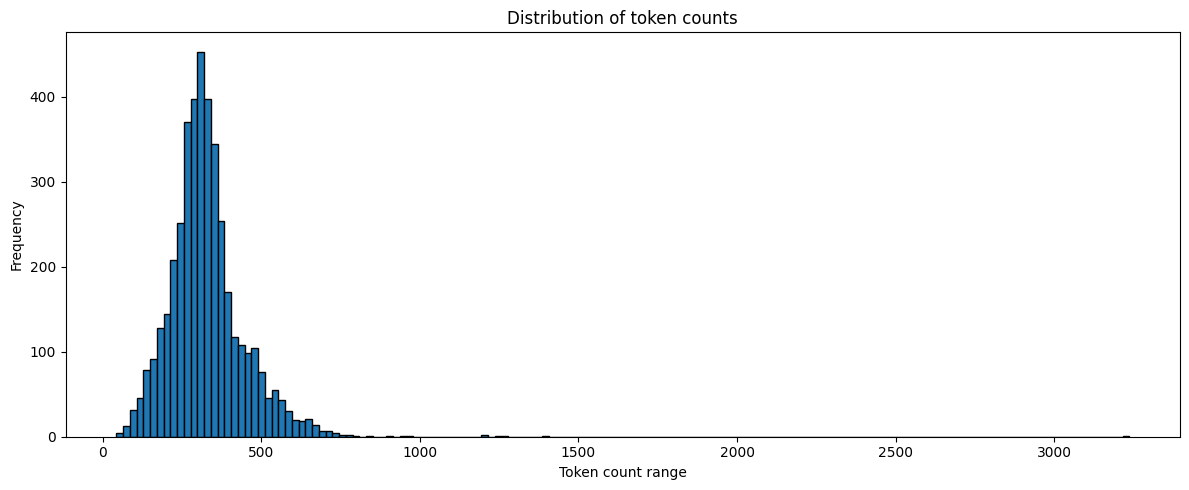

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 5))

plt.hist(df["num_tokens"], bins=150, edgecolor="black")
#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=30)) 
plt.xlabel("Token count range")
plt.ylabel("Frequency")
plt.title("Distribution of token counts")
plt.tight_layout()
plt.show()


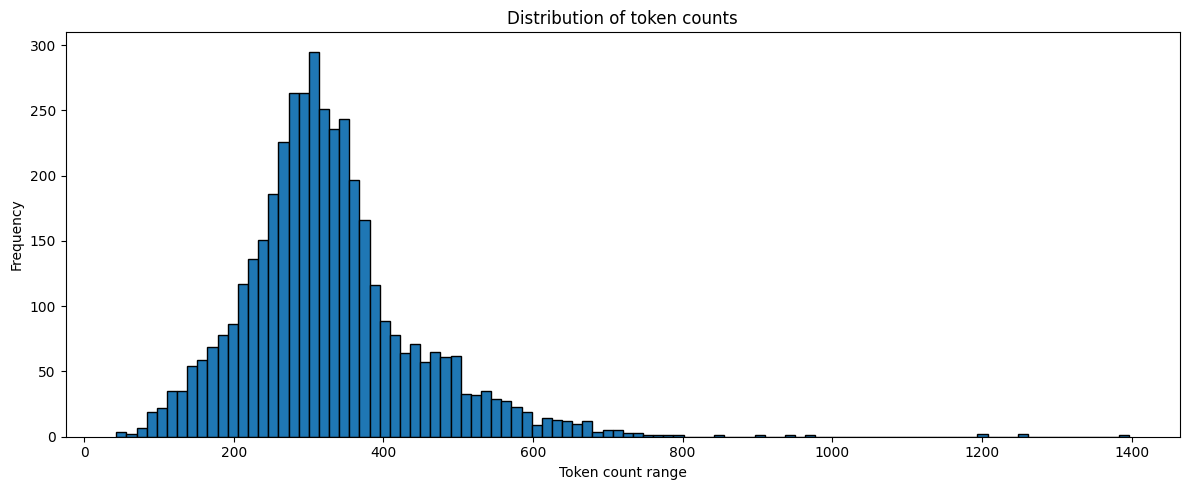

In [ ]:
# удаляем статью с количеством токенов > 3000, как ошибочную
df = df.drop(df[df['eLIBRARY ID'] == 54977679].index)

plt.figure(figsize=(12, 5))
plt.hist(df["num_tokens"], bins=100, edgecolor="black")
plt.xlabel("Token count range")
plt.ylabel("Frequency")
plt.title("Distribution of token counts")
plt.tight_layout()
plt.show()

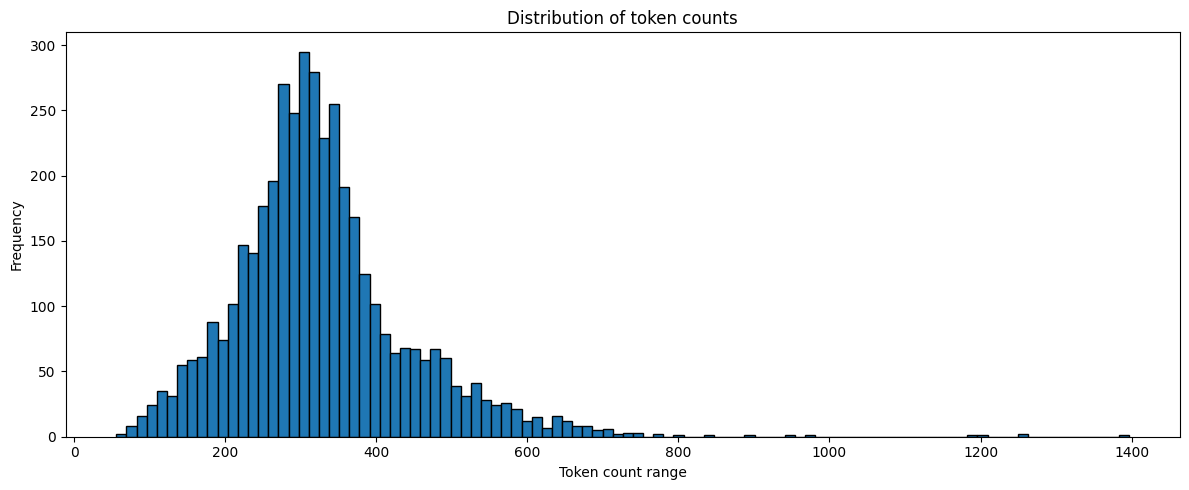

In [ ]:
# удаляем статьи с количеством токенов < 50
df = df[df['num_tokens'] > 50]

plt.figure(figsize=(12, 5))
plt.hist(df["num_tokens"], bins=100, edgecolor="black")
plt.xlabel("Token count range")
plt.ylabel("Frequency")
plt.title("Distribution of token counts")
plt.tight_layout()
plt.show()

In [22]:
df.to_csv('zeroshot/data/final_clean.csv', index=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4161 entries, 0 to 4492
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ссылка на статью     4161 non-null   object 
 1   DOI                  3844 non-null   object 
 2   eLIBRARY ID          4161 non-null   int64  
 3   article_type         4161 non-null   object 
 4   year                 4161 non-null   int64  
 5   language             4161 non-null   object 
 6   title_en             4161 non-null   object 
 7   key_words_en         4161 non-null   object 
 8   abstract_en          4161 non-null   object 
 9   authors_metadata_en  4153 non-null   object 
 10  title_ru             1498 non-null   object 
 11  key_words_ru         1498 non-null   object 
 12  abstract_ru          1498 non-null   object 
 13  authors_metadata_ru  1498 non-null   object 
 14  OECD                 4161 non-null   object 
 15  Название журнала     3314 non-null   object